Activity 2.1
We have seen the regression models for KNN and SVM. Complete the following tasks:

Using a sensible metric, and model validation techniques, compare the performance of a kNN and Decision Tree model as above on the noisy sine wave dataset.

Then, using a support vector regression model, create a new regression model for the above data.
Consider using different kernels for the model above. You should be able to get a very nice model this way!

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.svm import SVR
from sklearn.metrics import r2_score

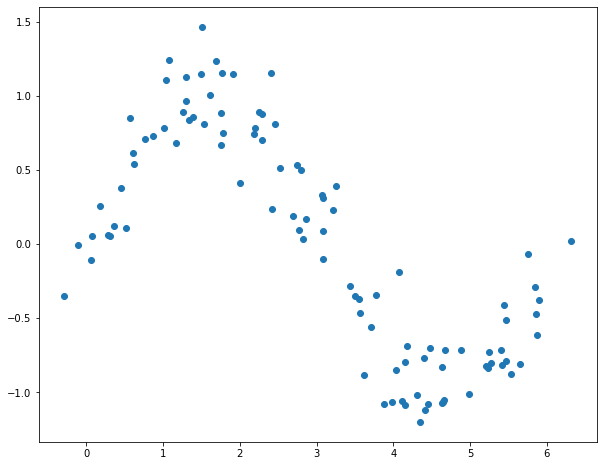

In [29]:
# Let's create a noisy sine wave.
x = np.linspace(0, 6, 101) + np.random.randn(101) / 5
y = np.sin(x) + np.random.randn(101) / 5

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)

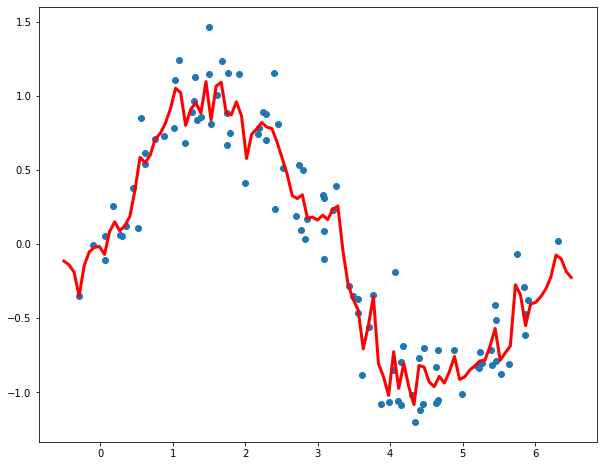

-2.7041041608236425


In [30]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')

# sklearn will shout at us unless we do the following line. The error is VERY VERY 
# common - so learn how to deal with it!
#You have to reshape the data for this to work
x_reshaped = x.reshape(-1, 1)
knn.fit(x_reshaped, y)

# Let's predict outside the initial range a bit to see how extrapolation works
x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict = knn.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict, c='red', lw=3)

plt.show()

r2_score(x_predict, y_predict)
print(r2_score(x_predict, y_predict,multioutput='variance_weighted'))

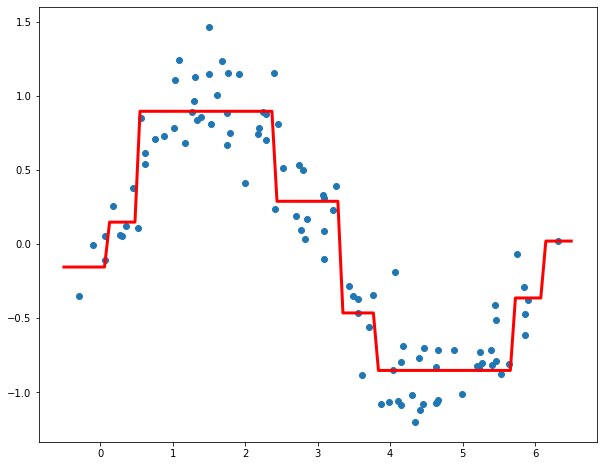

-2.6783604366519063


In [31]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dt = DecisionTreeRegressor(max_depth=3)
dt.fit(x_reshaped, y)

x_predict = np.linspace(-0.5, 6.5, 101)
x_predict_reshaped = x_predict.reshape(-1, 1)
y_predict = dt.predict(x_predict_reshaped)

fig, ax = plt.subplots(figsize=(10, 8))

ax.scatter(x, y)
ax.plot(x_predict, y_predict, c='red', lw=3)

plt.show()

r2_score(x_predict, y_predict)
print(r2_score(x_predict, y_predict,multioutput='variance_weighted'))
       

In [143]:
# Try and find why there is a difference?
x = np.sort(5 * np.random.rand(40, 1), axis=0)
#x = np.linspace(0, 6, 101) + np.random.randn(101) / 5
xx = np.linspace(0, 6, 101) + np.random.randn(101) / 5, axis=0
print(x,xx)

SyntaxError: invalid syntax (<ipython-input-143-b16741931e5f>, line 4)

In [127]:
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

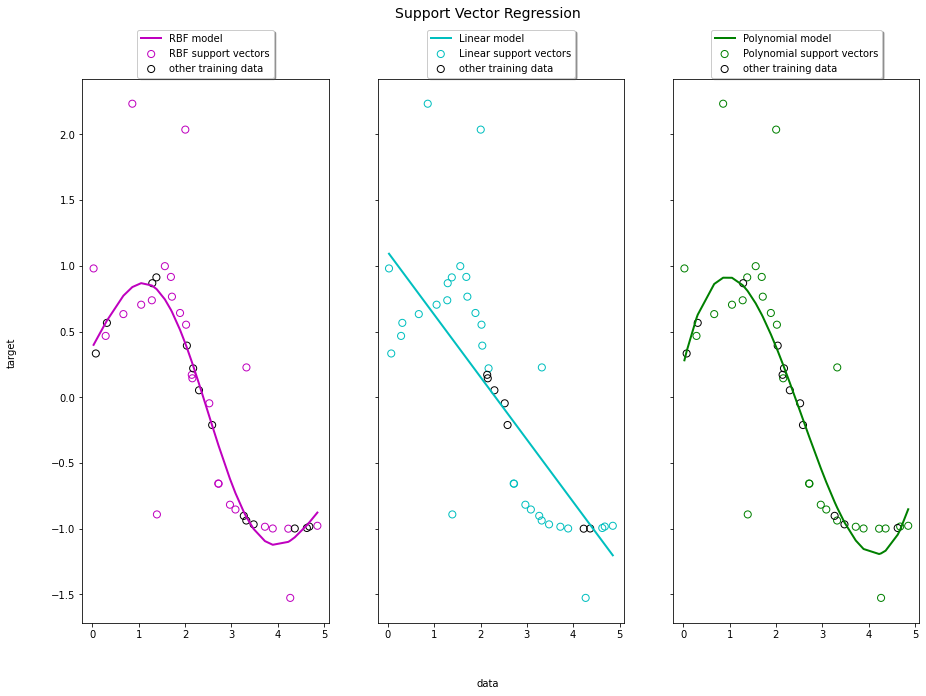

In [128]:
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']



fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
   
    
    axes[ix].plot(x, svr.fit(x, y).predict(x), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    
    axes[ix].scatter(x[svr.support_], y[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    
    axes[ix].scatter(x[np.setdiff1d(np.arange(len(x)), svr.support_)],
                     y[np.setdiff1d(np.arange(len(x)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')
    
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [84]:
x.reshape(1, -1)


array([[ 0.070702  , -0.28989358, -0.10412719,  0.35683985,  0.06232075,
         0.17720795,  0.28048693,  0.45603096,  0.51971264,  0.61932355,
         0.3057318 ,  0.61577129,  1.01841565,  0.76041389,  0.56476695,
         0.87497831,  1.38566007,  1.16748458,  1.03576979,  1.30212504,
         1.26166924,  1.53067645,  1.33542344,  1.0838017 ,  1.50627332,
         1.30036238,  1.75415515,  1.498849  ,  1.7547087 ,  1.61786835,
         2.00165665,  1.78801562,  1.9135582 ,  1.76532389,  2.17970144,
         1.68721406,  2.19321024,  2.25047664,  2.41783981,  2.29304054,
         2.4542089 ,  2.28691309,  2.79912903,  2.52812158,  2.40547188,
         2.82161247,  2.74306747,  3.07599753,  3.08207697,  2.76738456,
         2.85844787,  3.08543728,  2.69685717,  3.56151207,  3.08372561,
         3.21606077,  3.43509514,  3.25045065,  3.77095122,  3.49520616,
         3.55598577,  4.04091085,  3.88164127,  3.98391252,  3.61577791,
         3.70858864,  4.15359289,  4.30266252,  4.1

What does numpy reshape (-1 1) mean? Reshape your data either X.reshape (-1, 1) if your data has a single feature/column and X.reshape (1, -1) if it contains a single sample. If you are getting this error then in this video, I plan to demystify the confusion surrounding numpy reshape (1,-1) function.

In [ ]:
print(x)

In [100]:
x.reshape(1,-1)

array([[ 0.070702  , -0.28989358, -0.10412719,  0.35683985,  0.06232075,
         0.17720795,  0.28048693,  0.45603096,  0.51971264,  0.61932355,
         0.3057318 ,  0.61577129,  1.01841565,  0.76041389,  0.56476695,
         0.87497831,  1.38566007,  1.16748458,  1.03576979,  1.30212504,
         1.26166924,  1.53067645,  1.33542344,  1.0838017 ,  1.50627332,
         1.30036238,  1.75415515,  1.498849  ,  1.7547087 ,  1.61786835,
         2.00165665,  1.78801562,  1.9135582 ,  1.76532389,  2.17970144,
         1.68721406,  2.19321024,  2.25047664,  2.41783981,  2.29304054,
         2.4542089 ,  2.28691309,  2.79912903,  2.52812158,  2.40547188,
         2.82161247,  2.74306747,  3.07599753,  3.08207697,  2.76738456,
         2.85844787,  3.08543728,  2.69685717,  3.56151207,  3.08372561,
         3.21606077,  3.43509514,  3.25045065,  3.77095122,  3.49520616,
         3.55598577,  4.04091085,  3.88164127,  3.98391252,  3.61577791,
         3.70858864,  4.15359289,  4.30266252,  4.1